In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# read the dataset
data = pd.read_csv("D:\Heart_Disease_Project\data\heart_disease_preprocessed.csv")

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\DELL\AppData\Local\Temp\ipykernel_27032\78573308.py:2: SyntaxWarning: invalid escape sequence '\H'
  data = pd.read_csv("D:\Heart_Disease_Project\data\heart_disease_preprocessed.csv")


In [43]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# Separate features and target if target exists
X = data.drop(columns=['target']) if 'target' in data.columns else data.copy()
y = data['target'] if 'target' in data.columns else None

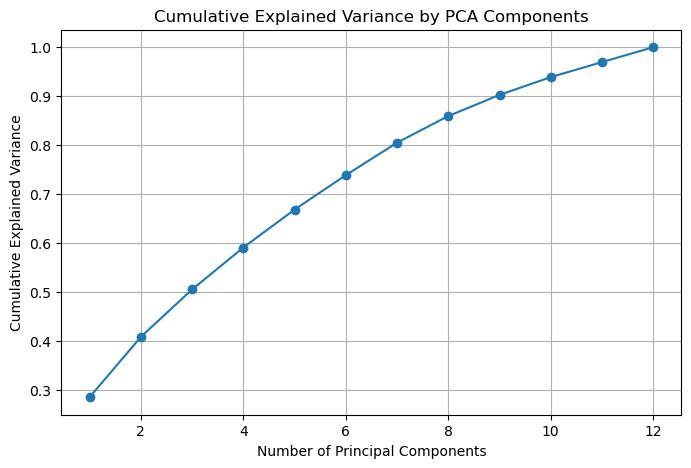

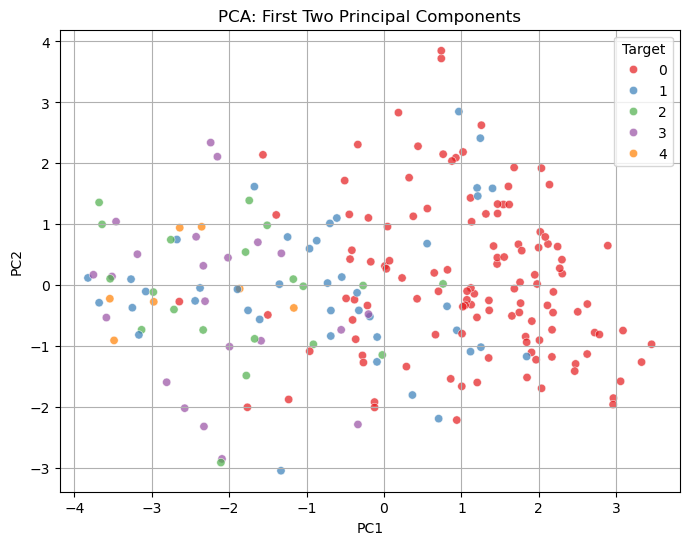

In [39]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
if y is not None:
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
    plt.legend(title='Target')
else:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Principal Components')
plt.grid(True)
plt.show()

In [41]:
# combine X_pca and y if y exists, otherwise just use X_pca

pca_results = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
if y is not None:
	pca_results["target"] = y.values

In [44]:
pca_results.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,target
0,-3.822996,0.120575,0.075100,-0.463223,0.662546,1.462671,0.020174,0.096355,0.547891,0.158878,0.387367,0.385205,1
1,0.288961,-1.334860,-1.583894,1.960742,-0.837852,0.057067,2.807012,1.896400,-0.469716,-0.779695,0.563730,-0.141393,0
2,2.301433,0.190145,-0.908260,1.364005,0.263102,0.701120,-0.062933,0.285689,0.763768,0.837109,-0.861921,1.225710,0
3,2.109940,-0.330508,0.507103,-0.242281,-0.800464,0.728626,0.782714,-0.436571,0.645706,-0.894108,0.504338,0.543069,0
4,-2.238280,2.340682,-2.215166,0.860493,0.141489,1.551162,1.073037,2.168493,-0.625642,-0.067583,0.416376,-0.289152,3


In [45]:
# rename columns to match the original dataset 
col = data.columns
pca_results.columns = col[:-1].tolist() + ['target'] if 'target' in data.columns else col.tolist()

In [46]:
pca_results.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-3.822996,0.120575,0.075100,-0.463223,0.662546,1.462671,0.020174,0.096355,0.547891,0.158878,0.387367,0.385205,1
1,0.288961,-1.334860,-1.583894,1.960742,-0.837852,0.057067,2.807012,1.896400,-0.469716,-0.779695,0.563730,-0.141393,0
2,2.301433,0.190145,-0.908260,1.364005,0.263102,0.701120,-0.062933,0.285689,0.763768,0.837109,-0.861921,1.225710,0
3,2.109940,-0.330508,0.507103,-0.242281,-0.800464,0.728626,0.782714,-0.436571,0.645706,-0.894108,0.504338,0.543069,0
4,-2.238280,2.340682,-2.215166,0.860493,0.141489,1.551162,1.073037,2.168493,-0.625642,-0.067583,0.416376,-0.289152,3


In [47]:
# save PCA as csv file
pca_results.to_csv(os.path.join(r"D:\Heart_Disease_Project\data", "heart_disease_data_pca_results.csv"), index=False)

In [48]:
pca_results['target'].value_counts() 

target
0    121
1     42
3     22
2     20
4      7
Name: count, dtype: int64